In [1]:
import pandas as pd

In [2]:
import numpy as np

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [39]:
# Load Excel file
data = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease",)

# View first few rows
print(data.head())


   age   sex               cp  trestbps  chol    fbs         restecg  thalch  \
0   63  Male   typical angina       145   233   True  lv hypertrophy     150   
1   41  Male  atypical angina       135   203  False          normal     132   
2   57  Male     asymptomatic       140   192  False          normal     148   
3   52  Male   typical angina       118   186  False  lv hypertrophy     190   
4   57  Male     asymptomatic       110   201  False          normal     126   

   exang  oldpeak        slope          thal  num  
0  False      2.3  downsloping  fixed defect    0  
1  False      0.0         flat  fixed defect    0  
2  False      0.4         flat  fixed defect    0  
3  False      0.0         flat  fixed defect    0  
4   True      1.5         flat  fixed defect    0  


In [40]:
print("Dataset Shape:", data.shape)


Dataset Shape: (908, 13)


In [41]:
print("\nDataset Info:")
print(data.info())



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [42]:
print("\nSummary Statistics:")
print(data.describe())



Summary Statistics:
              age    trestbps        chol      thalch     oldpeak         num
count  908.000000  908.000000  908.000000  908.000000  846.000000  908.000000
mean    53.791850  133.430617  201.484581  135.957048    0.891253    1.008811
std      9.158031   20.401608  112.097949   26.804929    1.093875    1.144436
min     29.000000    0.000000    0.000000   60.000000   -2.600000    0.000000
25%     47.750000  120.000000  176.750000  118.000000    0.000000    0.000000
50%     54.000000  130.000000  224.000000  138.000000    0.500000    1.000000
75%     60.000000  144.000000  270.000000  156.000000    1.500000    2.000000
max     77.000000  200.000000  603.000000  202.000000    6.200000    4.000000


In [43]:
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Missing Values in Each Column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [44]:
data_encoded = pd.get_dummies(data, drop_first=True)


In [45]:
print("Encoded Dataset:")
print(data_encoded.head())

Encoded Dataset:
   age  trestbps  chol    fbs  thalch  oldpeak  num  sex_Male  \
0   63       145   233   True     150      2.3    0      True   
1   41       135   203  False     132      0.0    0      True   
2   57       140   192  False     148      0.4    0      True   
3   52       118   186  False     190      0.0    0      True   
4   57       110   201  False     126      1.5    0      True   

   cp_atypical angina  cp_non-anginal  cp_typical angina  restecg_normal  \
0               False           False               True           False   
1                True           False              False            True   
2               False           False              False            True   
3               False           False               True           False   
4               False           False              False            True   

   restecg_st-t abnormality  exang_True  exang_FALSE  exang_TURE  slope_flat  \
0                     False       False        False   

In [46]:
X = data_encoded.drop('num', axis=1)
y = data_encoded['num']


In [47]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (726, 19)
Testing set size: (182, 19)


In [48]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree model
dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = dt_model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.47802197802197804

Confusion Matrix:
 [[64 14  5  6  0]
 [17 16  5  8  2]
 [ 3 10  4  4  1]
 [ 4  5  4  3  1]
 [ 1  4  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.33      0.33      0.33        48
           2       0.21      0.18      0.20        22
           3       0.14      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.28      0.28      0.28       182
weighted avg       0.48      0.48      0.48       182



In [50]:
import pandas as pd

# Load file
xls = pd.ExcelFile("heart_disease.xlsx")

# See available sheet names
print(xls.sheet_names)


['Description', 'Heart_disease']


In [51]:
import pandas as pd

# Load the Excel file
data = pd.read_excel("heart_disease.xlsx")

# Show first few rows
print(data.head())

# Check column names
print(data.columns.tolist())


        age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...
['age', 'Age in years']


In [52]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [53]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = dt_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.47802197802197804

Confusion Matrix:
 [[64 14  5  6  0]
 [17 16  5  8  2]
 [ 3 10  4  4  1]
 [ 4  5  4  3  1]
 [ 1  4  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.33      0.33      0.33        48
           2       0.21      0.18      0.20        22
           3       0.14      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.28      0.28      0.28       182
weighted avg       0.48      0.48      0.48       182



In [54]:
import pandas as pd

xls = pd.ExcelFile("heart_disease.xlsx")
print(xls.sheet_names)


['Description', 'Heart_disease']


In [57]:
# Step 7: Predict and Evaluate
y_pred = dt_model.predict(X_test)

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.47802197802197804

Confusion Matrix:
 [[64 14  5  6  0]
 [17 16  5  8  2]
 [ 3 10  4  4  1]
 [ 4  5  4  3  1]
 [ 1  4  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        89
           1       0.33      0.33      0.33        48
           2       0.21      0.18      0.20        22
           3       0.14      0.18      0.16        17
           4       0.00      0.00      0.00         6

    accuracy                           0.48       182
   macro avg       0.28      0.28      0.28       182
weighted avg       0.48      0.48      0.48       182



In [63]:
print("Features used for training:", X.columns.tolist())


Features used for training: ['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']


In [64]:
feature_names = ['Description']


In [65]:
feature_names = ['age', 'chol', 'trestbps']


In [67]:
print(X.columns.tolist())
print(len(X.columns))


['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Male', 'cp_atypical angina', 'cp_non-anginal', 'cp_typical angina', 'restecg_normal', 'restecg_st-t abnormality', 'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable defect']
19


In [69]:
print("Number of features in model:", dt_model.n_features_in_)
print("Number of feature names:", len(X.columns.tolist()))


Number of features in model: 19
Number of feature names: 19


In [70]:
from sklearn.tree import _tree

tree_ = dt_model.tree_
print("Feature indices in tree nodes:", tree_.feature)
print("Max feature index:", max(tree_.feature))
print("Min feature index:", min(tree_.feature))


Feature indices in tree nodes: [12  2  4  0  1  4  4 -2 -2 -2 -2 15  5 -2  0 -2 -2  3 -2 -2 18  4 11  5
  4 -2  0 -2 -2  0  4 -2 -2 -2  0  5 -2 -2  5 -2 -2  1  1  5 10 -2  1 -2
 -2  5  6 -2 -2  4 -2 -2  0 -2  5 -2 -2 -2  0  5  3  1  4 -2 -2 -2 -2 -2
  5 10  3 -2 -2 -2  4 -2 -2  5  0  7  8 18  3  2  4 -2  1 -2  2 -2 15 -2
  2 -2 -2  2 16 -2  1 -2 -2  4 -2 -2 15  4 -2 -2 -2  4  4  0 -2 -2 -2  0
 -2 16 -2  4 -2 -2  0 -2  0 18 11  1 16 -2 -2 -2 -2 -2  2 -2 -2 18 -2  5
  0  2 -2 -2 -2  1 -2 -2  3 18  4 -2  6  4 -2 10  8 -2 -2 -2  4 -2  4  4
  4 11 -2  4 -2 -2 -2 -2 -2 10  5  0 -2  2 -2 -2  0 -2 -2  1 -2  4 -2  1
 -2 -2  1  0 10  4 -2 -2 -2  6 -2  1  5 -2 -2 -2  5 -2  2 -2 -2  0  4  5
  8 17  1  2 -2 -2 11 -2 -2  7 -2 -2  3 10 18 -2 -2 -2 -2 -2  2 -2  4 -2
 -2  1  5  0  8 -2 -2 -2 -2  4  2  2  5 18 -2 -2 15 -2 -2  1  3 -2 -2 14
 -2  4 -2 -2 -2  2 -2  2 -2 -2  0  4  2 17 15  0 -2  4 -2  4 -2 -2  3  2
  4 -2 18  0 -2  0 -2 -2  4 -2  4 -2 -2  1 -2 -2  5 -2  5 -2 -2  1  5 -2
 15 -2 -2  1 -2 -2  

In [71]:
X.columns = [col.strip().replace(" ", "_") for col in X.columns]
print(X.columns.tolist())


['age', 'trestbps', 'chol', 'fbs', 'thalch', 'oldpeak', 'sex_Male', 'cp_atypical_angina', 'cp_non-anginal', 'cp_typical_angina', 'restecg_normal', 'restecg_st-t_abnormality', 'exang_True', 'exang_FALSE', 'exang_TURE', 'slope_flat', 'slope_upsloping', 'thal_normal', 'thal_reversable_defect']


In [72]:
dt_model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt


In [87]:
print("Dataset shape:", data.shape)
print("First 5 rows:\n", data.head())

Dataset shape: (12, 2)
First 5 rows:
         age                                       Age in years
0    Gender                       Gender ; Male - 1, Female -0
1        cp                                    Chest pain type
2  trestbps                             Resting blood pressure
3      chol                                cholesterol measure
4       fbs  (fasting blood sugar > 120 mg/dl) (1 = true; 0...


In [88]:
print("\nSummary statistics:\n", data.describe())


Summary statistics:
            age                  Age in years
count       12                            12
unique      12                            12
top     Gender  Gender ; Male - 1, Female -0
freq         1                             1


In [89]:
print("\nData types:\n", data.dtypes)
print("\nMissing values:\n", data.isnull().sum())



Data types:
 age             object
Age in years    object
dtype: object

Missing values:
 age             0
Age in years    0
dtype: int64


In [90]:
print("\nNumber of duplicate rows:", data.duplicated().sum())


Number of duplicate rows: 0


In [91]:
numerical_features = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

In [92]:
for col in numerical_features:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[col])
    plt.title(f'Box plot of {col}')
    plt.show()

In [94]:
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)


Categorical columns: ['age', 'Age in years']


In [95]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8, 5)


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


In [12]:
data = pd.read_excel("heart_disease.xlsx", sheet_name="Heart_disease")


In [16]:
import os
os.listdir()


['.anaconda',
 '.conda',
 '.condarc',
 '.continuum',
 '.ipynb_checkpoints',
 '.ipython',
 '.jupyter',
 '.matplotlib',
 '.spyder-py3',
 '.streamlit',
 '.virtual_documents',
 '.vscode',
 '5 assignment',
 'adult_with_headers.csv',
 'anaconda3',
 'anaconda_projects',
 'anime.csv',
 'AppData',
 'Application Data',
 'ASSIGNEMENT 6 MLR.ipynb',
 'Assignment 12.ipynb',
 'Assignment.3.ipynb',
 'assignment.ipynb',
 'ASSIGNMENT10.ipynb',
 'Assignment11.ipynb',
 'Assignment13.ipynb',
 'Assignment2.ipynb',
 'Assignment4.ipynb',
 'Assignment6.ipynb',
 'Assignment7.ipynb',
 'Assignment8.ipynb',
 'assingment3.ipynb',
 'basic statical',
 'basic statics',
 'Basic Stats (1).docx',
 'Basic stats - 1.zip',
 'Cardiotocographic.csv',
 'Contacts',
 'Cookies',
 'DA.py',
 'data_standardization.csv',
 'Documents',
 'Downloads',
 'EastWestAirlines.xlsx',
 'EDA Assignment.ipynb',
 'EDA1.zip',
 'Enscape',
 'Favorites',
 'heart_disease.xlsx',
 'Jedi',
 'Links',
 'Local Settings',
 'me',
 'Microsoft',
 'Music',
 'My D

In [18]:
print(data.shape)


(908, 13)


In [19]:
print("✅ Dataset Loaded Successfully!")
print("Shape:", data.shape)
print("\n--- Dataset Info ---")
print(data.info())


✅ Dataset Loaded Successfully!
Shape: (908, 13)

--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB
None


In [20]:
print("\n--- Summary Statistics ---")
print(data.describe(include='all'))


--- Summary Statistics ---
               age   sex            cp    trestbps        chol    fbs restecg  \
count   908.000000   908           908  908.000000  908.000000    908     908   
unique         NaN     2             4         NaN         NaN      2       3   
top            NaN  Male  asymptomatic         NaN         NaN  False  normal   
freq           NaN   718           495         NaN         NaN    723     542   
mean     53.791850   NaN           NaN  133.430617  201.484581    NaN     NaN   
std       9.158031   NaN           NaN   20.401608  112.097949    NaN     NaN   
min      29.000000   NaN           NaN    0.000000    0.000000    NaN     NaN   
25%      47.750000   NaN           NaN  120.000000  176.750000    NaN     NaN   
50%      54.000000   NaN           NaN  130.000000  224.000000    NaN     NaN   
75%      60.000000   NaN           NaN  144.000000  270.000000    NaN     NaN   
max      77.000000   NaN           NaN  200.000000  603.000000    NaN     NaN   


In [21]:
print("\n--- Missing Values per Column ---")
print(data.isnull().sum())



--- Missing Values per Column ---
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [22]:
print("\n--- Unique Values per Column ---")
for col in data.columns:
    print(f"{col}: {data[col].nunique()} unique values")



--- Unique Values per Column ---
age: 49 unique values
sex: 2 unique values
cp: 4 unique values
trestbps: 85 unique values
chol: 228 unique values
fbs: 2 unique values
restecg: 3 unique values
thalch: 122 unique values
exang: 4 unique values
oldpeak: 53 unique values
slope: 3 unique values
thal: 3 unique values
num: 5 unique values


In [23]:


numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns


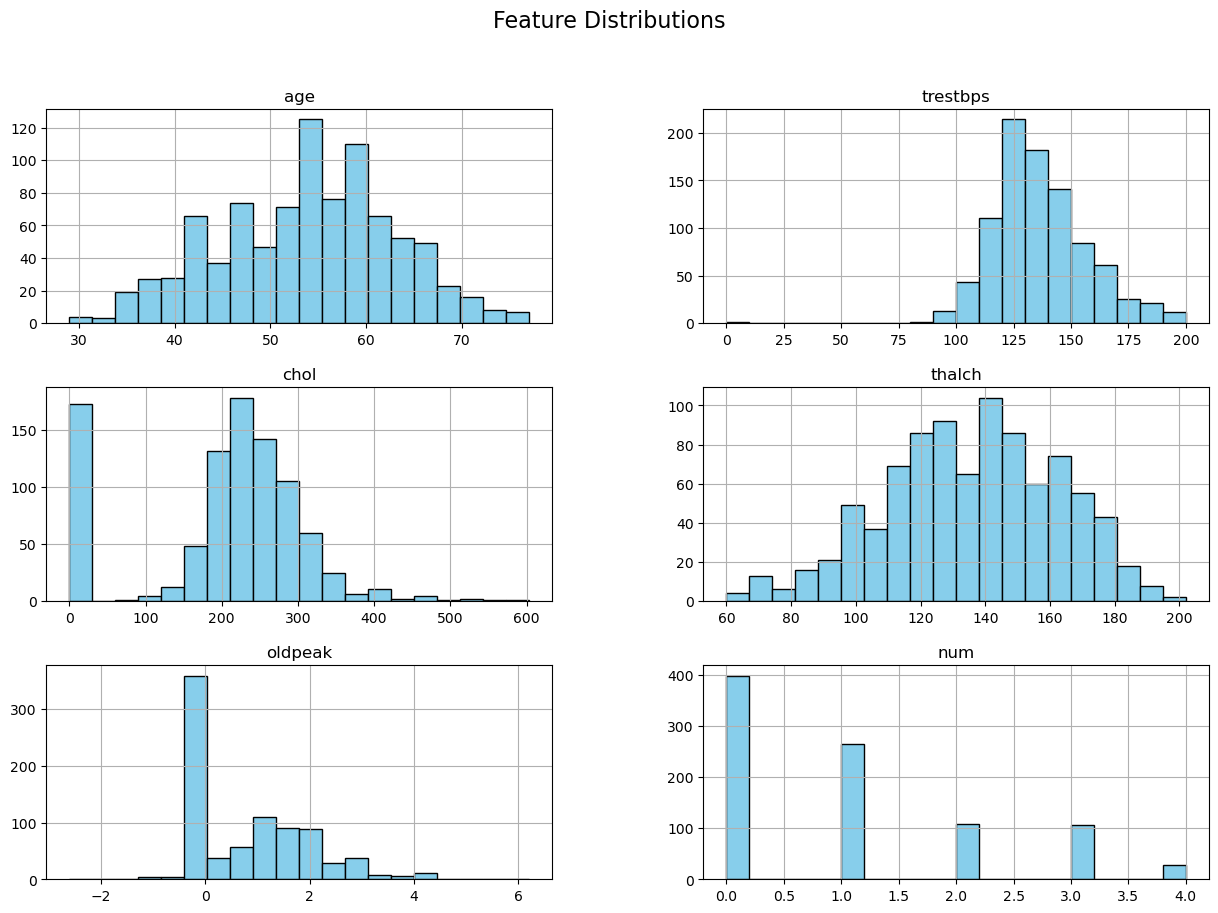

In [24]:
data[numeric_cols].hist(figsize=(15, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions', fontsize=16)
plt.show()


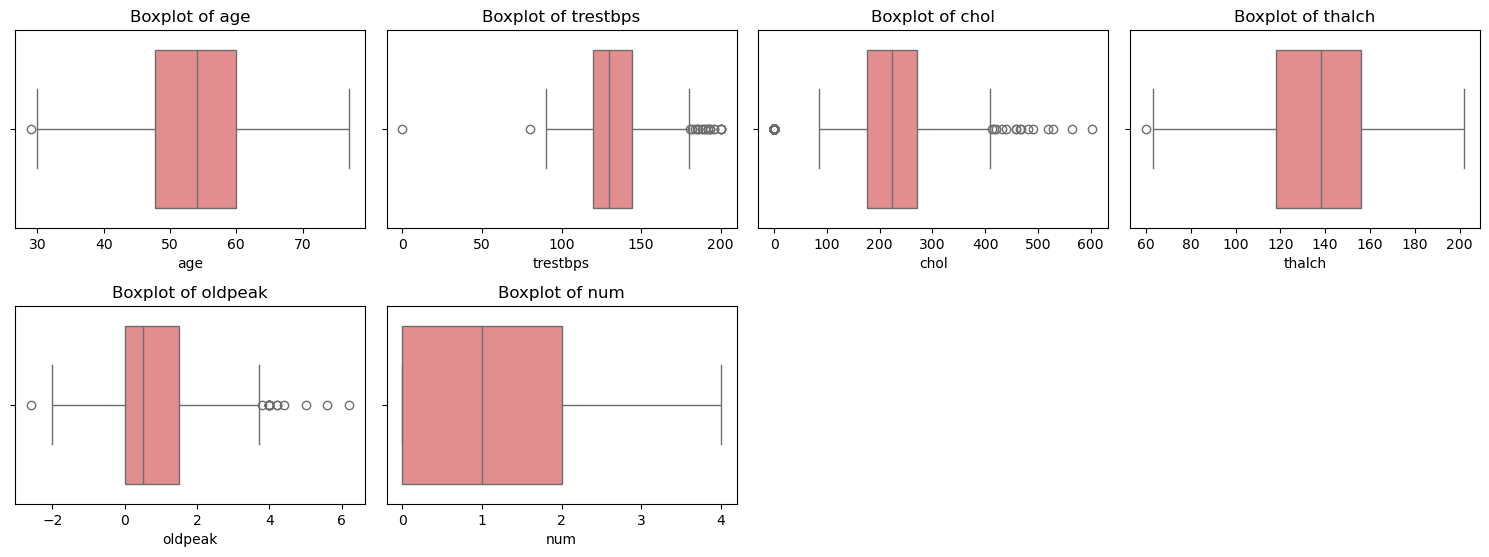

In [25]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=data[col], color='lightcoral')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

In [27]:
# Identify categorical and numerical columns
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns

print("Categorical Columns:", list(categorical_cols))
print("Numeric Columns:", list(numeric_cols))

# Convert categorical columns to numeric using one-hot encoding
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\n✅ Encoding complete!")
print("New shape after encoding:", data_encoded.shape)
print("\nSample of encoded data:\n", data_encoded.head())


Categorical Columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
Numeric Columns: ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']

✅ Encoding complete!
New shape after encoding: (908, 20)

Sample of encoded data:
    age  trestbps  chol  thalch  oldpeak  num  sex_Male  cp_atypical angina  \
0   63       145   233     150      2.3    0      True               False   
1   41       135   203     132      0.0    0      True                True   
2   57       140   192     148      0.4    0      True               False   
3   52       118   186     190      0.0    0      True               False   
4   57       110   201     126      1.5    0      True               False   

   cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
0           False               True      True           False   
1           False              False     False            True   
2           False              False     False            True   
3           False              

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define X (features) and y (target)
X = data_encoded.drop('num', axis=1)   # assuming 'num' is your target column
y = data_encoded['num']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.46153846153846156

Confusion Matrix:
 [[62 21  2  3  1]
 [19 15  4  5  5]
 [ 3 12  3  3  1]
 [ 5  5  2  4  1]
 [ 2  3  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        89
           1       0.27      0.31      0.29        48
           2       0.25      0.14      0.18        22
           3       0.27      0.24      0.25        17
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.29      0.28      0.28       182
weighted avg       0.46      0.46      0.46       182



In [31]:
import pandas as pd

# Identify categorical columns (those with object or bool types)
categorical_cols = data.select_dtypes(include=['object', 'bool']).columns
print("Categorical columns:", list(categorical_cols))

# Convert categorical columns to numeric (0/1 encoding)
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\n✅ Encoding complete!")
print("New shape:", data_encoded.shape)
print(data_encoded.head())


Categorical columns: ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']

✅ Encoding complete!
New shape: (908, 20)
   age  trestbps  chol  thalch  oldpeak  num  sex_Male  cp_atypical angina  \
0   63       145   233     150      2.3    0      True               False   
1   41       135   203     132      0.0    0      True                True   
2   57       140   192     148      0.4    0      True               False   
3   52       118   186     190      0.0    0      True               False   
4   57       110   201     126      1.5    0      True               False   

   cp_non-anginal  cp_typical angina  fbs_True  restecg_normal  \
0           False               True      True           False   
1           False              False     False            True   
2           False              False     False            True   
3           False               True     False           False   
4           False              False     False            True   

   restecg_s

In [32]:
X = data_encoded.drop('num', axis=1)
y = data_encoded['num']


In [33]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate model
print("✅ Model Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


✅ Model Evaluation
Accuracy: 0.46153846153846156

Confusion Matrix:
 [[62 21  2  3  1]
 [19 15  4  5  5]
 [ 3 12  3  3  1]
 [ 5  5  2  4  1]
 [ 2  3  1  0  0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.70      0.69        89
           1       0.27      0.31      0.29        48
           2       0.25      0.14      0.18        22
           3       0.27      0.24      0.25        17
           4       0.00      0.00      0.00         6

    accuracy                           0.46       182
   macro avg       0.29      0.28      0.28       182
weighted avg       0.46      0.46      0.46       182



In [38]:
print("Unique values in target column (num):", y.unique())


Unique values in target column (num): [0 1 2 3 4]


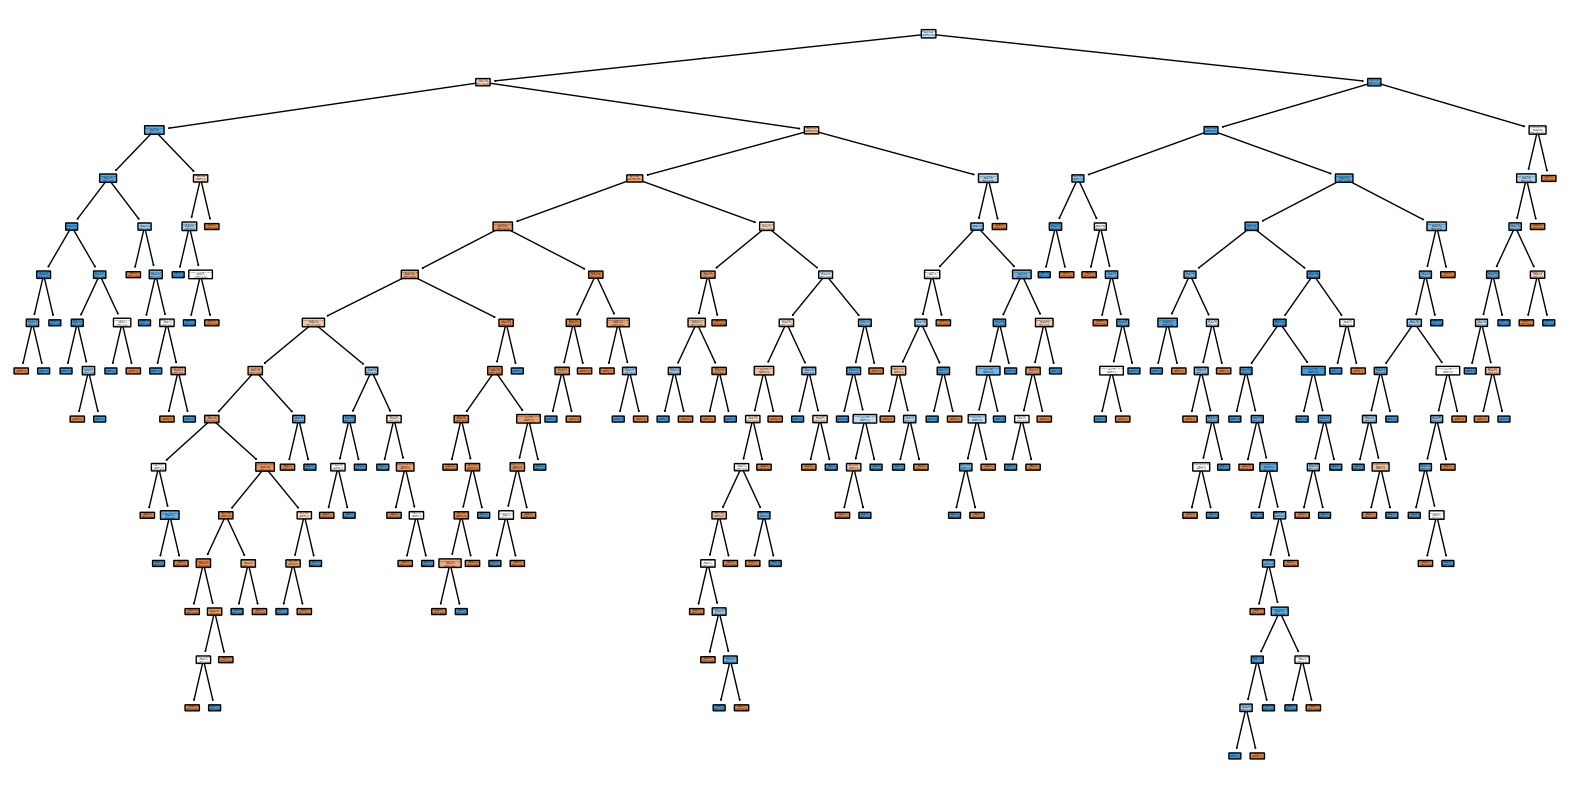

In [39]:
# Convert to binary target
data_encoded['num'] = data_encoded['num'].apply(lambda x: 0 if x==0 else 1)

# Redefine features and target
X = data_encoded.drop('num', axis=1)
y = data_encoded['num']

# Split, train, and visualize
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot tree
plt.figure(figsize=(20,10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Disease', 'Disease'], rounded=True)
plt.show()


In [41]:
print("Missing values per column:")
print(data.isnull().sum())


Missing values per column:
age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [44]:
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("Shape after encoding:", data_encoded.shape)


Shape after encoding: (908, 20)


In [45]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']
scaler = StandardScaler()
data_encoded[numeric_cols] = scaler.fit_transform(data_encoded[numeric_cols])


In [46]:
# Convert target to binary
data_encoded['num'] = data_encoded['num'].apply(lambda x: 0 if x == 0 else 1)

# Features and target
X = data_encoded.drop('num', axis=1)
y = data_encoded['num']


In [47]:
from sklearn.model_selection import train_test_split

# Split into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [48]:
from sklearn.tree import DecisionTreeClassifier

# Initialize model
model = DecisionTreeClassifier(random_state=42)

# Train model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [49]:
y_pred = model.predict(X_test)


In [50]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7087912087912088
Confusion Matrix:
 [[64 25]
 [28 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        89
           1       0.72      0.70      0.71        93

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182



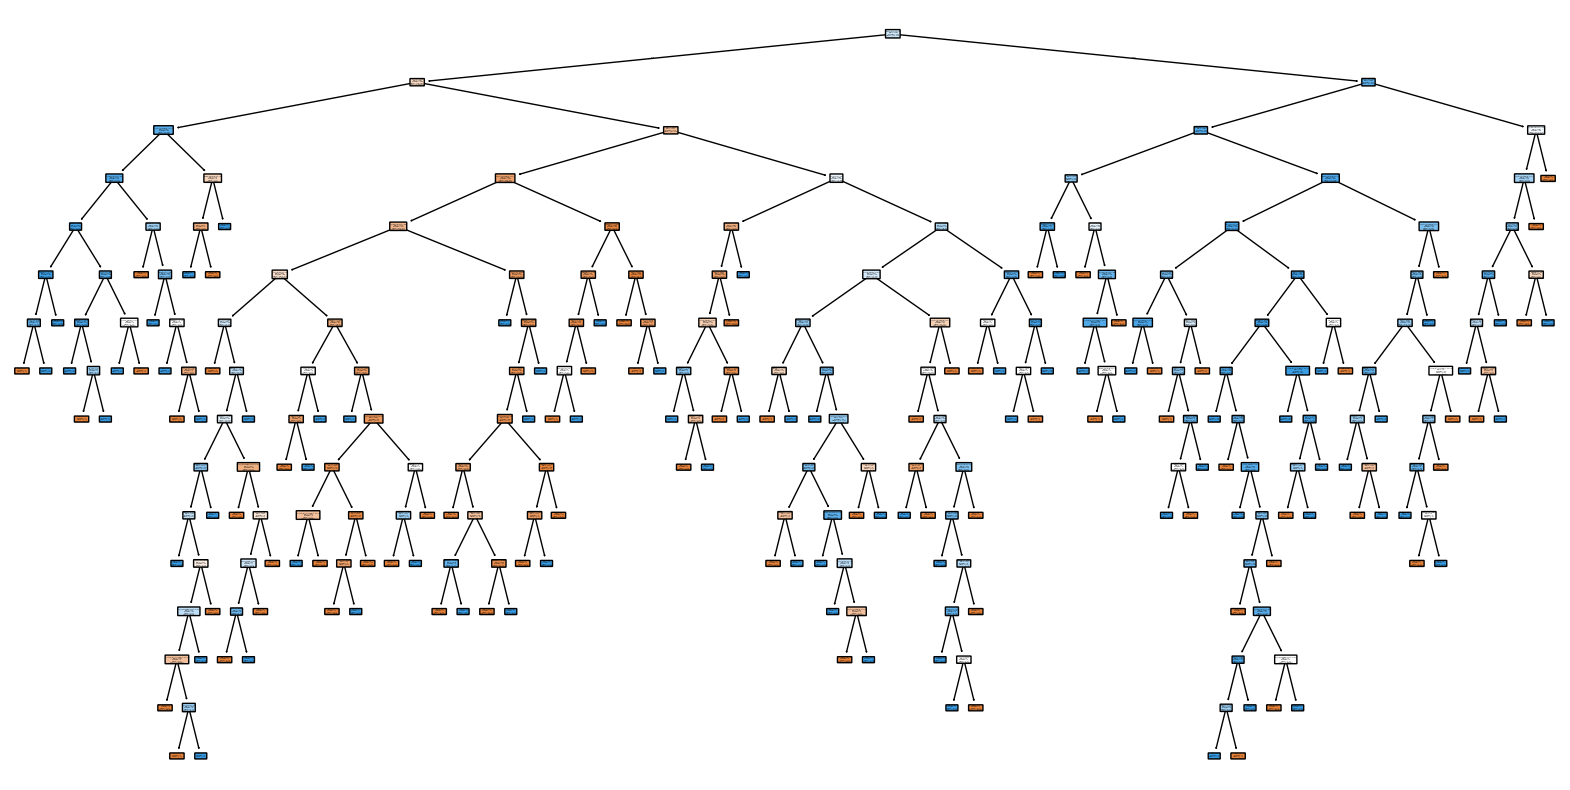

In [51]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'],
          rounded=True)
plt.show()


In [52]:
from sklearn.model_selection import train_test_split

# 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)



In [53]:
from sklearn.tree import DecisionTreeClassifier

# Initialize Decision Tree Classifier
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [54]:
y_pred = model.predict(X_test)


In [55]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# ROC-AUC (probabilities required)
y_prob = model.predict_proba(X_test)[:,1]  # probability for class 1
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


Accuracy: 0.7087912087912088
Confusion Matrix:
 [[64 25]
 [28 65]]
Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71        89
           1       0.72      0.70      0.71        93

    accuracy                           0.71       182
   macro avg       0.71      0.71      0.71       182
weighted avg       0.71      0.71      0.71       182

ROC-AUC Score: 0.7090129273891507


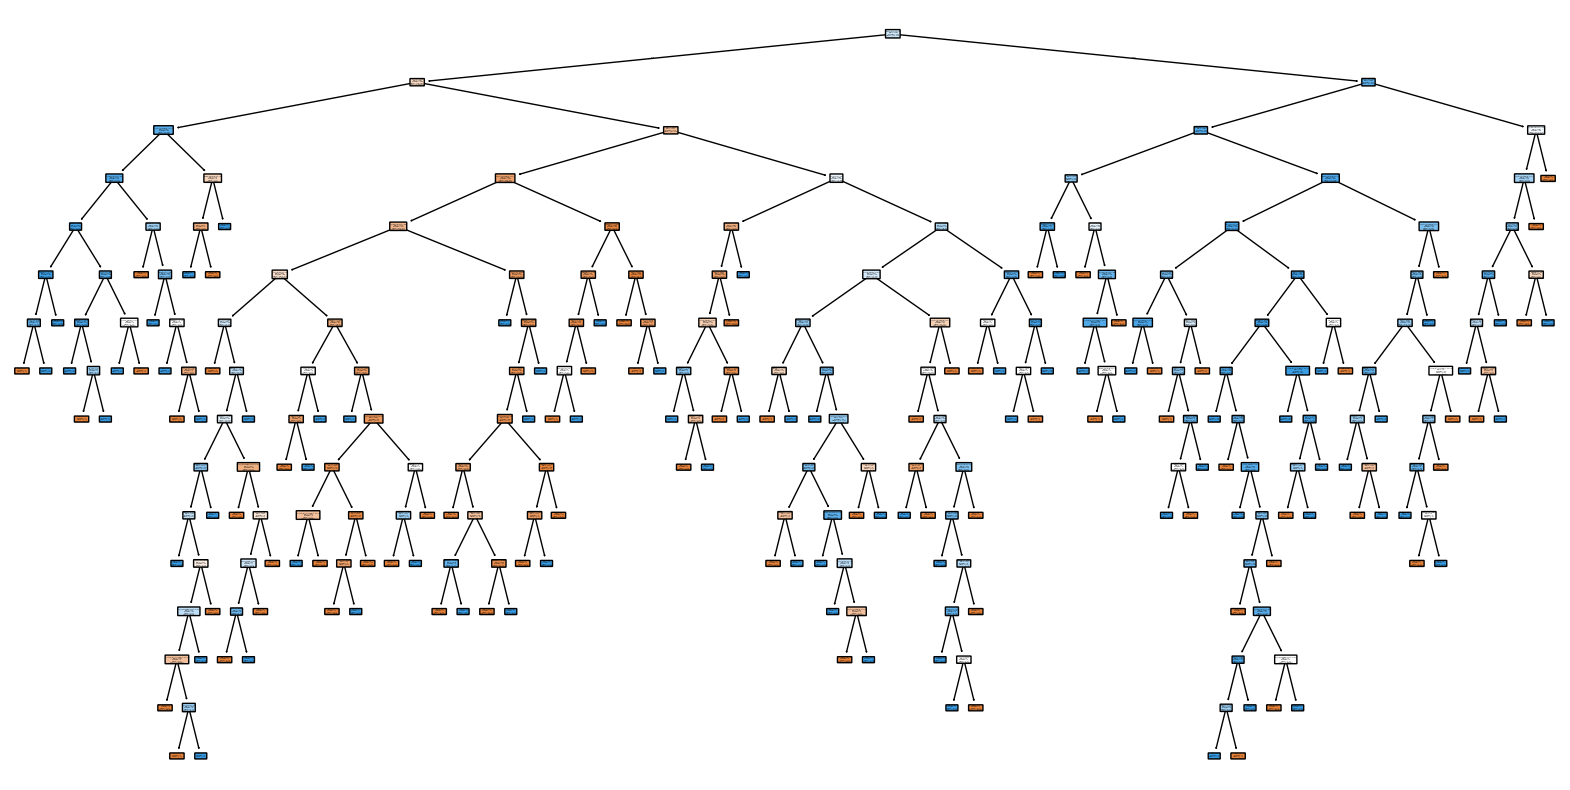

In [56]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'],
          rounded=True)
plt.show()


In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier


In [58]:
# Initialize the Decision Tree
dtree = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid
param_grid = {
    'max_depth': [3, 5, 7, 9, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}



In [59]:
# GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=dtree, 
                           param_grid=param_grid, 
                           cv=5,        # 5-fold cross-validation
                           scoring='accuracy',
                           n_jobs=-1)   # use all cores

grid_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [60]:
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.771412376003779


In [61]:
best_model = grid_search.best_estimator_

# Predictions on test set
y_pred_best = best_model.predict(X_test)

# Evaluation
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

print("Test Accuracy:", accuracy_score(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))

# ROC-AUC
y_prob_best = best_model.predict_proba(X_test)[:,1]
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_best))


Test Accuracy: 0.7802197802197802
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77        89
           1       0.78      0.80      0.79        93

    accuracy                           0.78       182
   macro avg       0.78      0.78      0.78       182
weighted avg       0.78      0.78      0.78       182

ROC-AUC Score: 0.8280173976078289


Accuracy: 0.7802197802197802
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.76      0.77        89
           1       0.78      0.80      0.79        93

    accuracy                           0.78       182
   macro avg       0.78      0.78      0.78       182
weighted avg       0.78      0.78      0.78       182



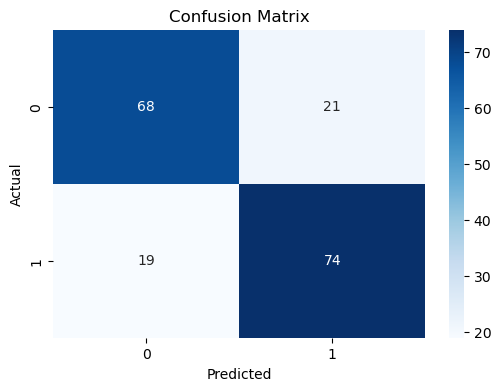

ROC-AUC Score: 0.8280173976078289


In [62]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Predictions
y_pred = best_model.predict(X_test)
y_prob = best_model.predict_proba(X_test)[:,1]

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ROC-AUC
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)


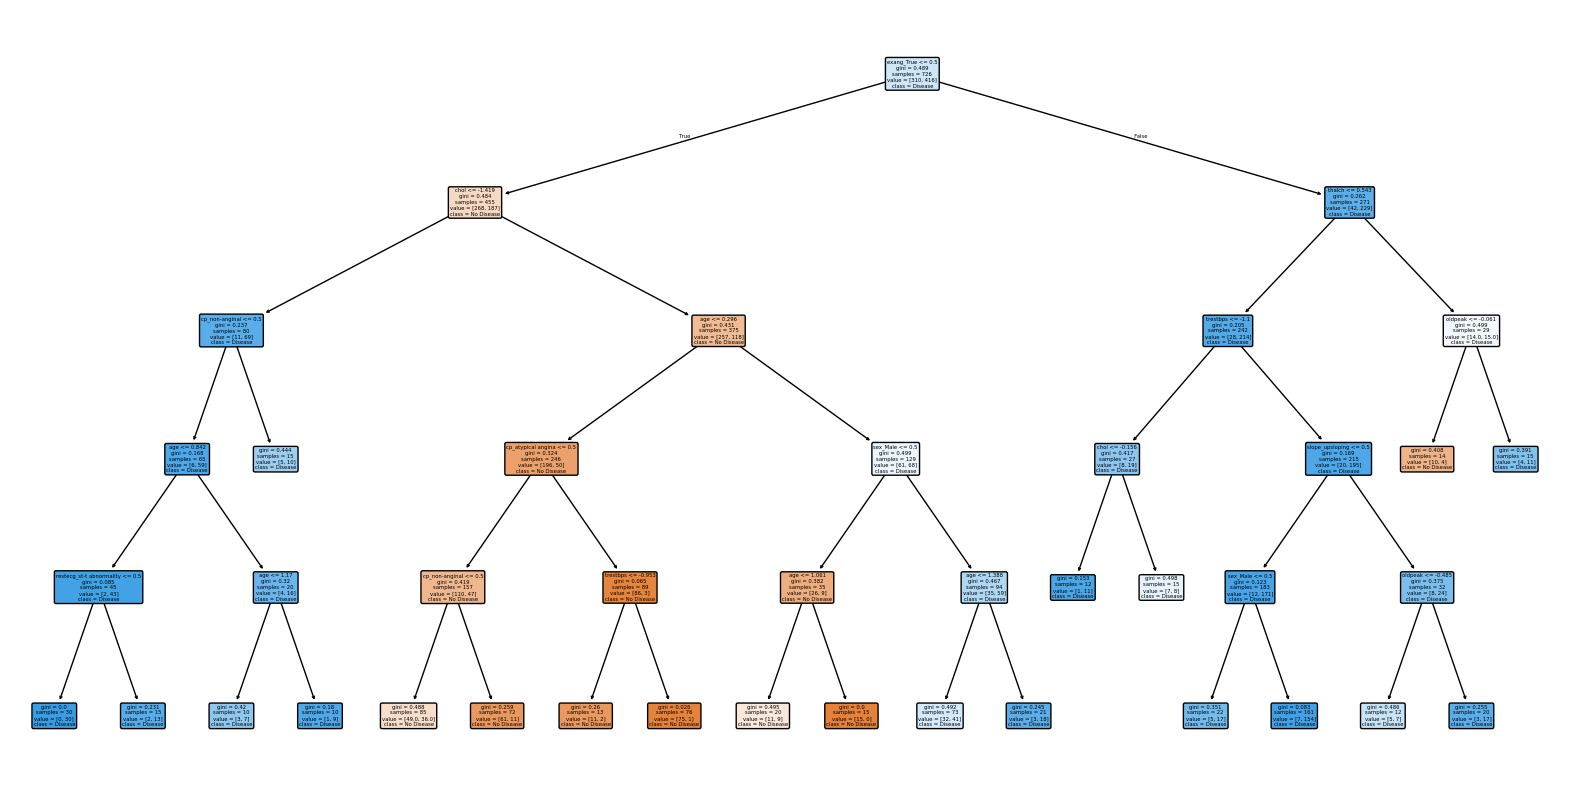

In [63]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(best_model, 
          filled=True, 
          feature_names=X.columns, 
          class_names=['No Disease', 'Disease'],
          rounded=True)
plt.show()


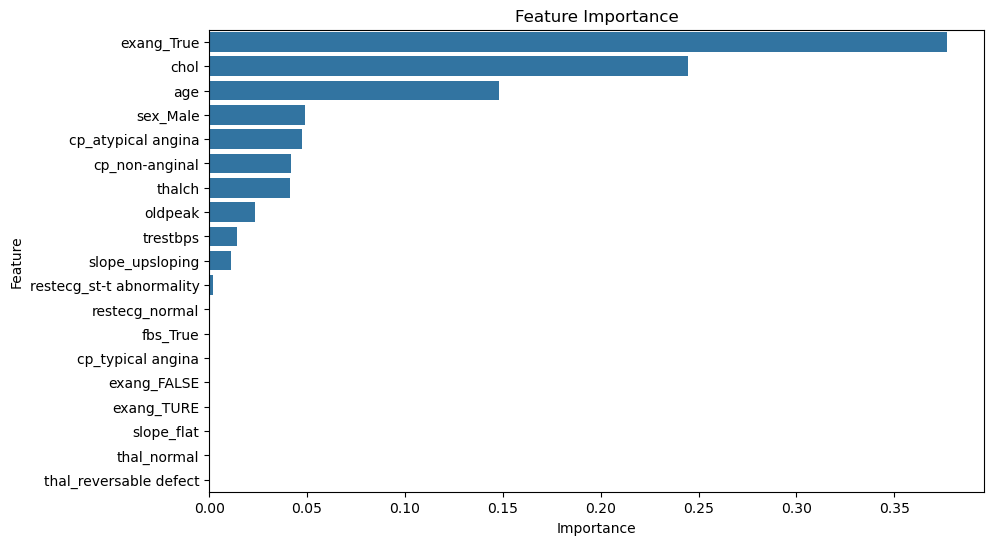

In [64]:
# Feature importance
importances = best_model.feature_importances_
feature_names = X.columns

# Create a DataFrame for better visualization
feat_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_importance)
plt.title("Feature Importance")
plt.show()


INTERVIEW QUESTION:

Interview Questions:
1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
Hyperparameter	Description	Effect on Model
max_depth	Maximum depth of the tree	Controls overfitting: too deep → overfitting, too shallow → underfitting
min_samples_split	Minimum samples required to split an internal node	Higher value → simpler tree, reduces overfitting
min_samples_leaf	Minimum samples required at a leaf node	Prevents leaves with very few samples → smoother model
criterion	Function to measure split quality (gini or entropy)	Determines how splits are made, usually similar results
max_features	Number of features considered for best split	Helps reduce overfitting by limiting features
max_leaf_nodes	Maximum number of leaf nodes	Limits tree complexity, prevents overfitting



2. What is the difference between the Label encoding and One-hot encoding?
   Aspect	Label Encoding	One-Hot Encoding
How it works	Assigns a unique integer to each category	Creates binary columns for each category (0 or 1)
Output	Single column with integers	Multiple columns, one per category
Use case	Ordinal categorical variables (order matters)	Nominal categorical variables (no order)
Example	Colors: Red→0, Green→1, Blue→2	Colors: Red→[1,0,0], Green→[0,1,0], Blue→[0,0,1]
Risk	Can introduce unintended ordinal relationship	No unintended order, safe for ML models